<a href="https://colab.research.google.com/github/Nikhita-Palla/Plant-Leaf-Disease-Detection-using-YOLO/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import xml.etree.ElementTree as ET
import glob
import os
import json
from PIL import Image
from IPython.display import Image
import pandas as pd
import numpy as np

Understanding the dataset

In [ ]:
import yaml
with open('/content/drive/MyDrive/leaf/yolov5/data.yaml', 'r') as f:
    data = yaml.load(f, Loader=yaml.FullLoader)
class_names = data['names']
print(len(class_names))
for i in class_names:
  print(i)

30
Apple Scab Leaf
Apple leaf
Apple rust leaf
Bell_pepper leaf spot
Bell_pepper leaf
Blueberry leaf
Cherry leaf
Corn Gray leaf spot
Corn leaf blight
Corn rust leaf
Peach leaf
Potato leaf early blight
Potato leaf late blight
Potato leaf
Raspberry leaf
Soyabean leaf
Soybean leaf
Squash Powdery mildew leaf
Strawberry leaf
Tomato Early blight leaf
Tomato Septoria leaf spot
Tomato leaf bacterial spot
Tomato leaf late blight
Tomato leaf mosaic virus
Tomato leaf yellow virus
Tomato leaf
Tomato mold leaf
Tomato two spotted spider mites leaf
grape leaf black rot
grape leaf


The YOLO format in a .txt file for the corresponding .jpg file typically consists of one row for each labeled image in dataset, where each row contains the following information separated by spaces:

- The class index of the object in the image (starting from 0).
- The x-coordinate of the center of the object relative to the width of the image.
- The y-coordinate of the center of the object relative to the height of the image.
- The width of the object relative to the width of the image.
- The height of the object relative to the height of the image.

In [ ]:
label_dir = '/content/drive/MyDrive/leaf/train/labels/00009_jpg.rf.b4187ecff7dbde2ac358f15e01adcecb.txt'
with open((label_dir), 'r') as f:
      for line in f:
           class_label=line.split()[0]
           x_coordinate=line.split()[1]
           y_coordinate=line.split()[2]
           width=line.split()[3]
           height=line.split()[4]
print('class-label:',class_label)
print('X-coordinate:',x_coordinate)
print('Y-coordinate:',y_coordinate)
print('Width:',width)
print('Height:',height)

class-label: 12
X-coordinate: 0.454070981210856
Y-coordinate: 0.415625
Width: 0.5198329853862214
Height: 0.8062500000000001


In [ ]:
keys=[i for i in range(1,31)]
values=class_names
d={}
j=0
for i in keys:
  d[i]=values[j]
  j+=1
labels_per_class = pd.DataFrame(d.values(), index = d.keys(), columns=["Label Name"])
labels_per_class

Label Name
1                        Apple Scab Leaf
2                             Apple leaf
3                        Apple rust leaf
4                  Bell_pepper leaf spot
5                       Bell_pepper leaf
6                         Blueberry leaf
7                            Cherry leaf
8                    Corn Gray leaf spot
9                       Corn leaf blight
10                        Corn rust leaf
11                            Peach leaf
12              Potato leaf early blight
13               Potato leaf late blight
14                           Potato leaf
15                        Raspberry leaf
16                         Soyabean leaf
17                          Soybean leaf
18            Squash Powdery mildew leaf
19                       Strawberry leaf
20              Tomato Early blight leaf
21             Tomato Septoria leaf spot
22            Tomato leaf bacterial spot
23               Tomato leaf late blight
24              Tomato leaf mosaic virus
25              Tomato leaf yellow virus
26                           Tomato leaf
27                      Tomato mold leaf
28  Tomato two spotted spider mites leaf
29                  grape leaf black rot
30                            grape leaf

In [ ]:
map={}
for i in keys:
  map[i]=0
label_dir = '/content/drive/MyDrive/leaf/train/labels'
k=[]
for label_name in os.listdir(label_dir):
    with open(os.path.join(label_dir,label_name), 'r') as f:
      for line in f:
           class_label=int(line.split()[0])+1
           k.append(class_label) 
for i in map:
  map[i]=k.count(i)
images_per_class = pd.DataFrame(map.values(), index = map.keys(), columns=["Number of Images"])
images_per_class['Labels']=d.values()
images_per_class
           

Number of Images                                Labels
1                158                       Apple Scab Leaf
2                232                            Apple leaf
3                167                       Apple rust leaf
4                312                 Bell_pepper leaf spot
5                248                      Bell_pepper leaf
6                796                        Blueberry leaf
7                218                           Cherry leaf
8                 72                   Corn Gray leaf spot
9                356                      Corn leaf blight
10               117                        Corn rust leaf
11               579                            Peach leaf
12                11              Potato leaf early blight
13               301               Potato leaf late blight
14               235                           Potato leaf
15               539                        Raspberry leaf
16               246                         Soyabean leaf
17                15                          Soybean leaf
18               243            Squash Powdery mildew leaf
19               438                       Strawberry leaf
20               193              Tomato Early blight leaf
21               402             Tomato Septoria leaf spot
22               373            Tomato leaf bacterial spot
23               266               Tomato leaf late blight
24               204              Tomato leaf mosaic virus
25               225              Tomato leaf yellow virus
26               759                           Tomato leaf
27               279                      Tomato mold leaf
28                 2  Tomato two spotted spider mites leaf
29               201                  grape leaf black rot
30               125                            grape leaf

Dataset preparation

Removing the images of train directory that dont have corresponding labels

In [ ]:
# file1='/content/drive/MyDrive/Data/train/images'
# file2='/content/drive/MyDrive/Data/train/labels'
# c=0
# for i in os.listdir(file1):
#   k=i
#   j=i[::-1].replace('gpj.','txt.',1)[::-1]
#   if j not in os.listdir(file2):
#     os.remove(os.path.join(file1,i))

Removing the images of test directory that dont have corresponding labels

In [ ]:
# file1='/content/drive/MyDrive/Data/test/images'
# file2='/content/drive/MyDrive/Data/test/labels'
# c=0
# for i in os.listdir(file2):
#   k=i
#   j=i[::-1].replace('lmx.','gpj.',1)[::-1]
#   if j not in os.listdir(file1):
#     os.remove(os.path.join(file2,i))

Checking if the count of labels and images in the test and train directory are same or not

In [ ]:
file1='/content/drive/MyDrive/leaf/train/images'
file2='/content/drive/MyDrive/leaf/train/labels'
print(len(os.listdir(file1)))
print(len(os.listdir(file2)))

2321
2321


In [ ]:
file1='/content/drive/MyDrive/leaf/test/images'
file2='/content/drive/MyDrive/leaf/test/labels'
print(len(os.listdir(file1)))
print(len(os.listdir(file2)))

239
239


Data visualisation

Visualising some images from train directory with bounding box

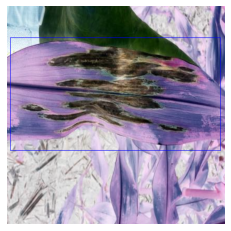

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/leaf/train/images/05c_jpg.rf.f77c5f73f34958a2c2d36aaf56f6b495.jpg")
dh, dw, _ = img.shape

fl = open("/content/drive/MyDrive/leaf/train/labels/05c_jpg.rf.f77c5f73f34958a2c2d36aaf56f6b495.txt", 'r')
data = fl.readlines()
fl.close()
for dt in data:
    # Split string to float
    l= list(dt.split())
    _=float(l[0])
    x=float(l[1])
    y=float(l[2])
    w=float(l[3])
    h=float(l[4])
    
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

plt.imshow(img)
plt.axis('off')
plt.show()

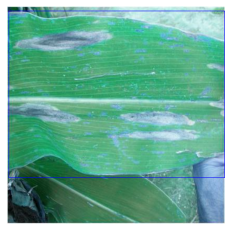

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/leaf/train/images/071409%20Vincelli%20nlb%20on%20corn%20leaf_JPG_jpg.rf.19c27c3a5a7edc0ac7d0760b0e5a6f55.jpg")
dh, dw, _ = img.shape

fl = open("/content/drive/MyDrive/leaf/train/labels/071409%20Vincelli%20nlb%20on%20corn%20leaf_JPG_jpg.rf.19c27c3a5a7edc0ac7d0760b0e5a6f55.txt", 'r')
data = fl.readlines()
fl.close()
for dt in data:
    # Split string to float
    l= list(dt.split())
    _=float(l[0])
    x=float(l[1])
    y=float(l[2])
    w=float(l[3])
    h=float(l[4])
    
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 1, 255), 1)

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
%cd /content/drive/MyDrive/leaf

/content/drive/MyDrive/leaf


In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd /content/drive/MyDrive/leaf/yolov5

/content/drive/MyDrive/leaf/yolov5


In [ ]:
!pip install -r requirements.txt

In [ ]:
!python train.py --img 416 --batch 16 --epochs 400 --data data.yaml --cfg '/content/drive/MyDrive/leaf/yolov5/models/custom_yolov5s.yaml' --weights '' --name yolov5s_results  --cache

requirements: YOLOv5 requirement "gitpython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.2 MB/s eta 0:00:00

requirements: 1 package updated per ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=, cfg=/content/drive/MyDrive/leaf/yolov5/models/custom_yolov5s.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=400, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[

In [ ]:
!python detect.py --weights '/content/drive/MyDrive/leaf/yolov5/runs/train/yolov5s_results4/weights/best.pt' --img 128 --conf 0.25 --source '/content/drive/MyDrive/leaf/test/images'

In [ ]:
!python detect.py --weights '/content/drive/MyDrive/leaf/yolov5/runs/train/yolov5s_results4/weights/best.pt' --img 128 --conf 0.15 --source '/content/drive/MyDrive/leaf/test/images'

In [ ]:
!python detect.py --weights '/content/drive/MyDrive/leaf/yolov5/runs/train/yolov5s_results4/weights/best.pt' --source '/content/drive/MyDrive/leaf/test/images' --save-conf

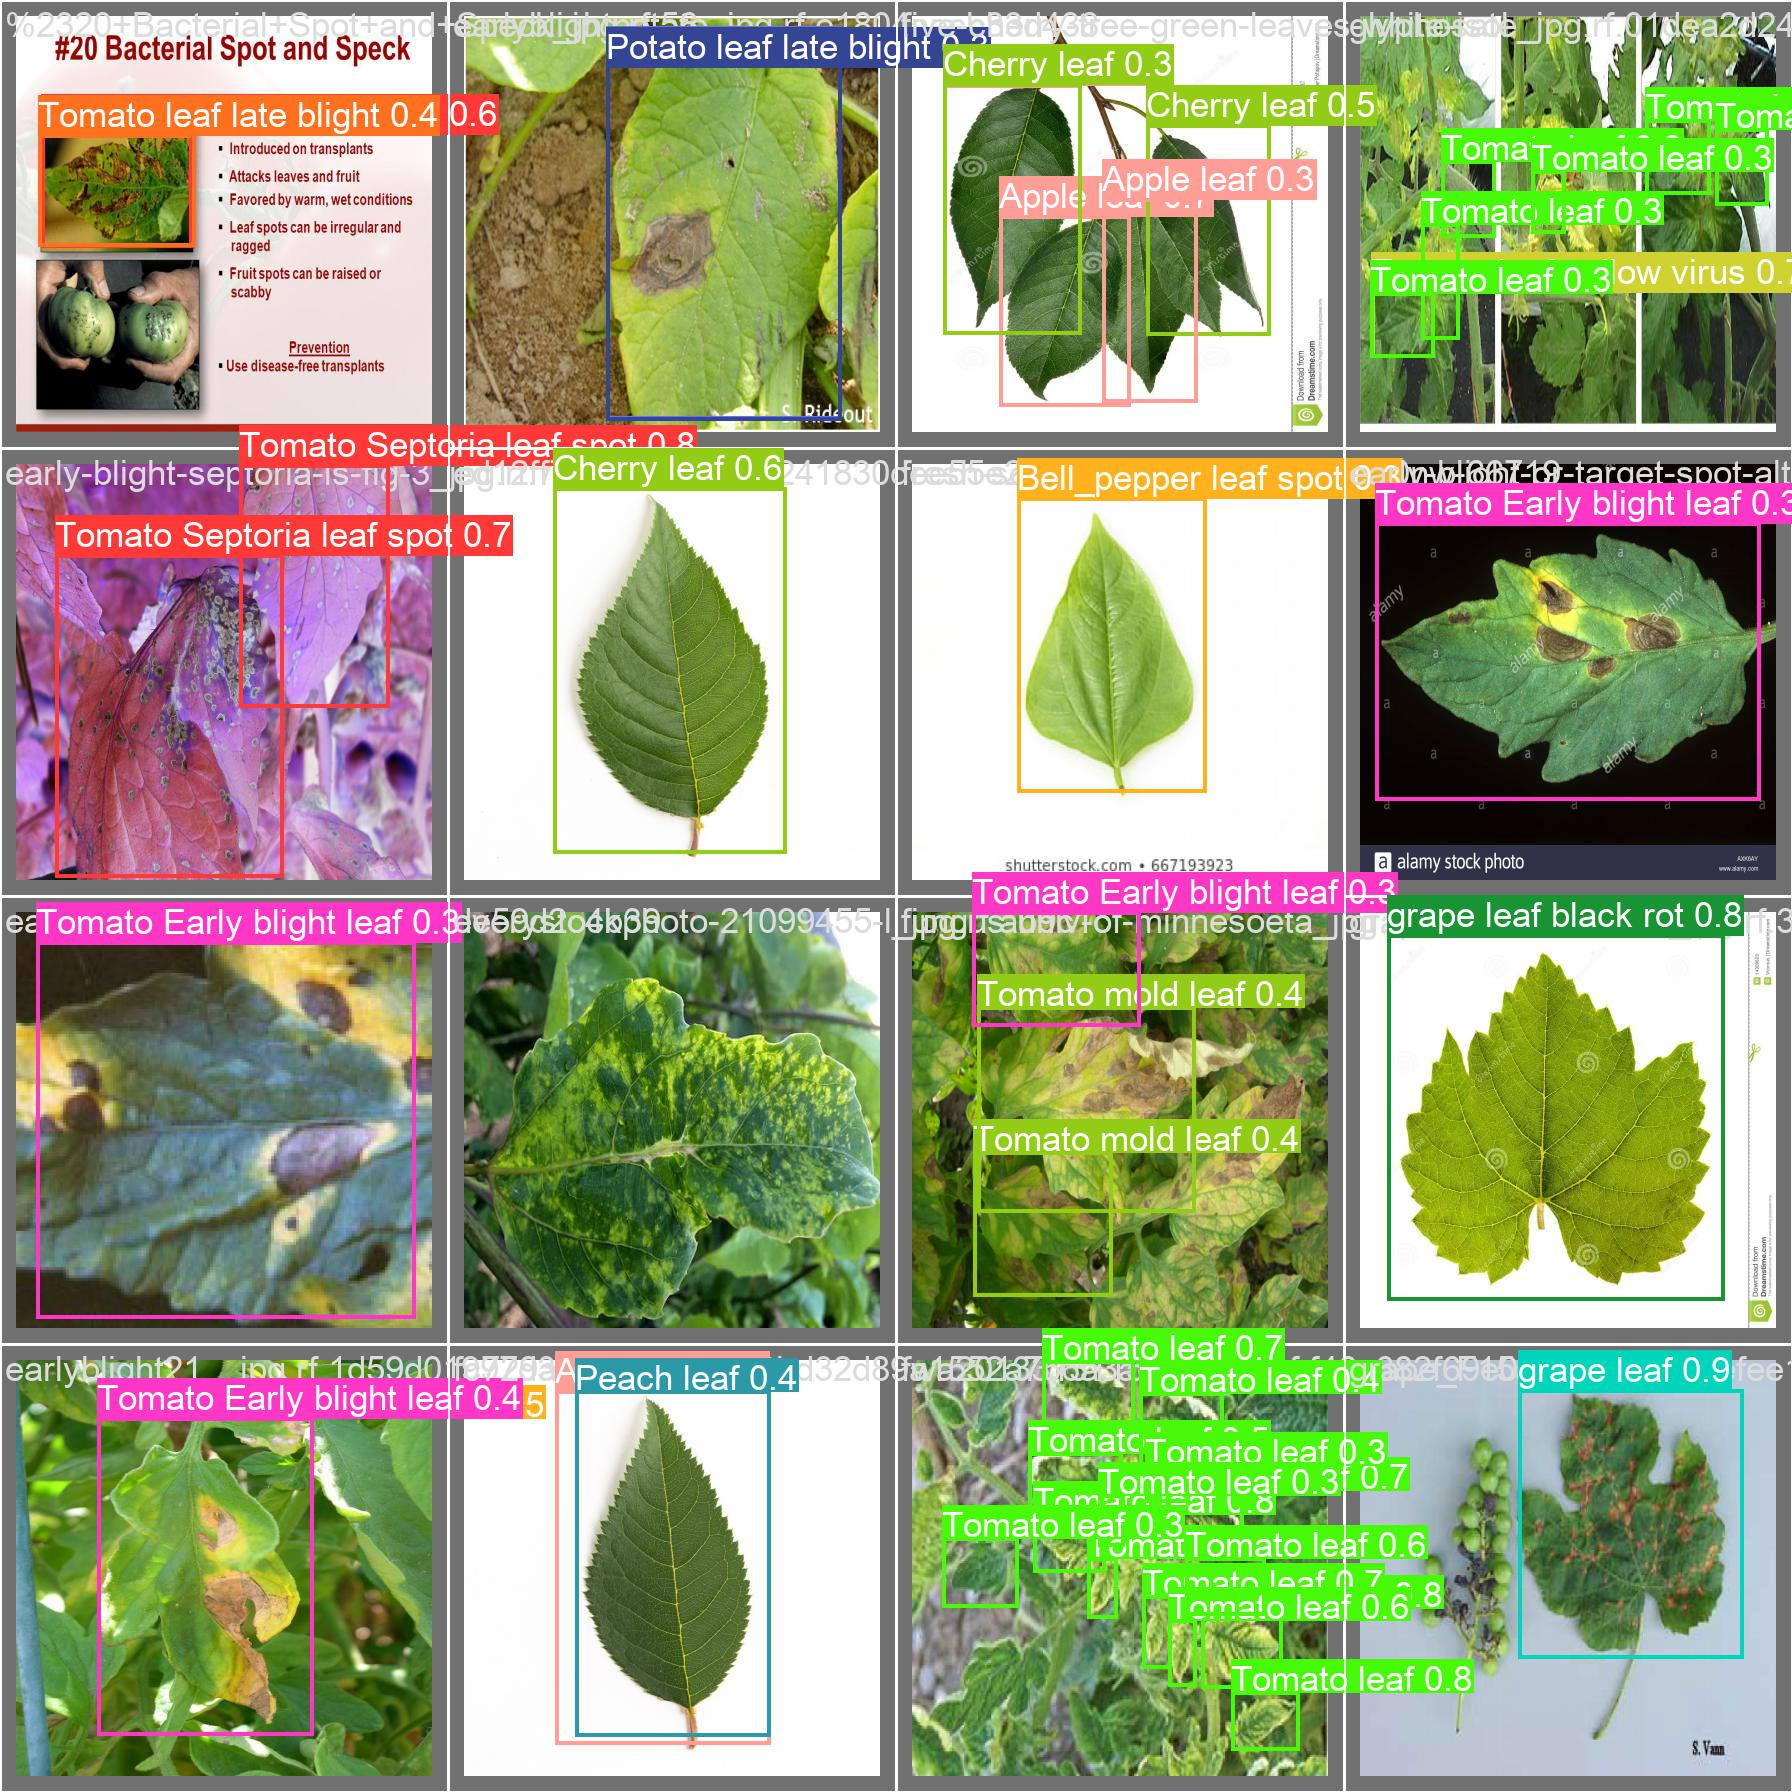

In [ ]:
Image(filename="/content/drive/MyDrive/leaf/yolov5/runs/train/yolov5s_results4/val_batch0_pred.jpg",width=1000)

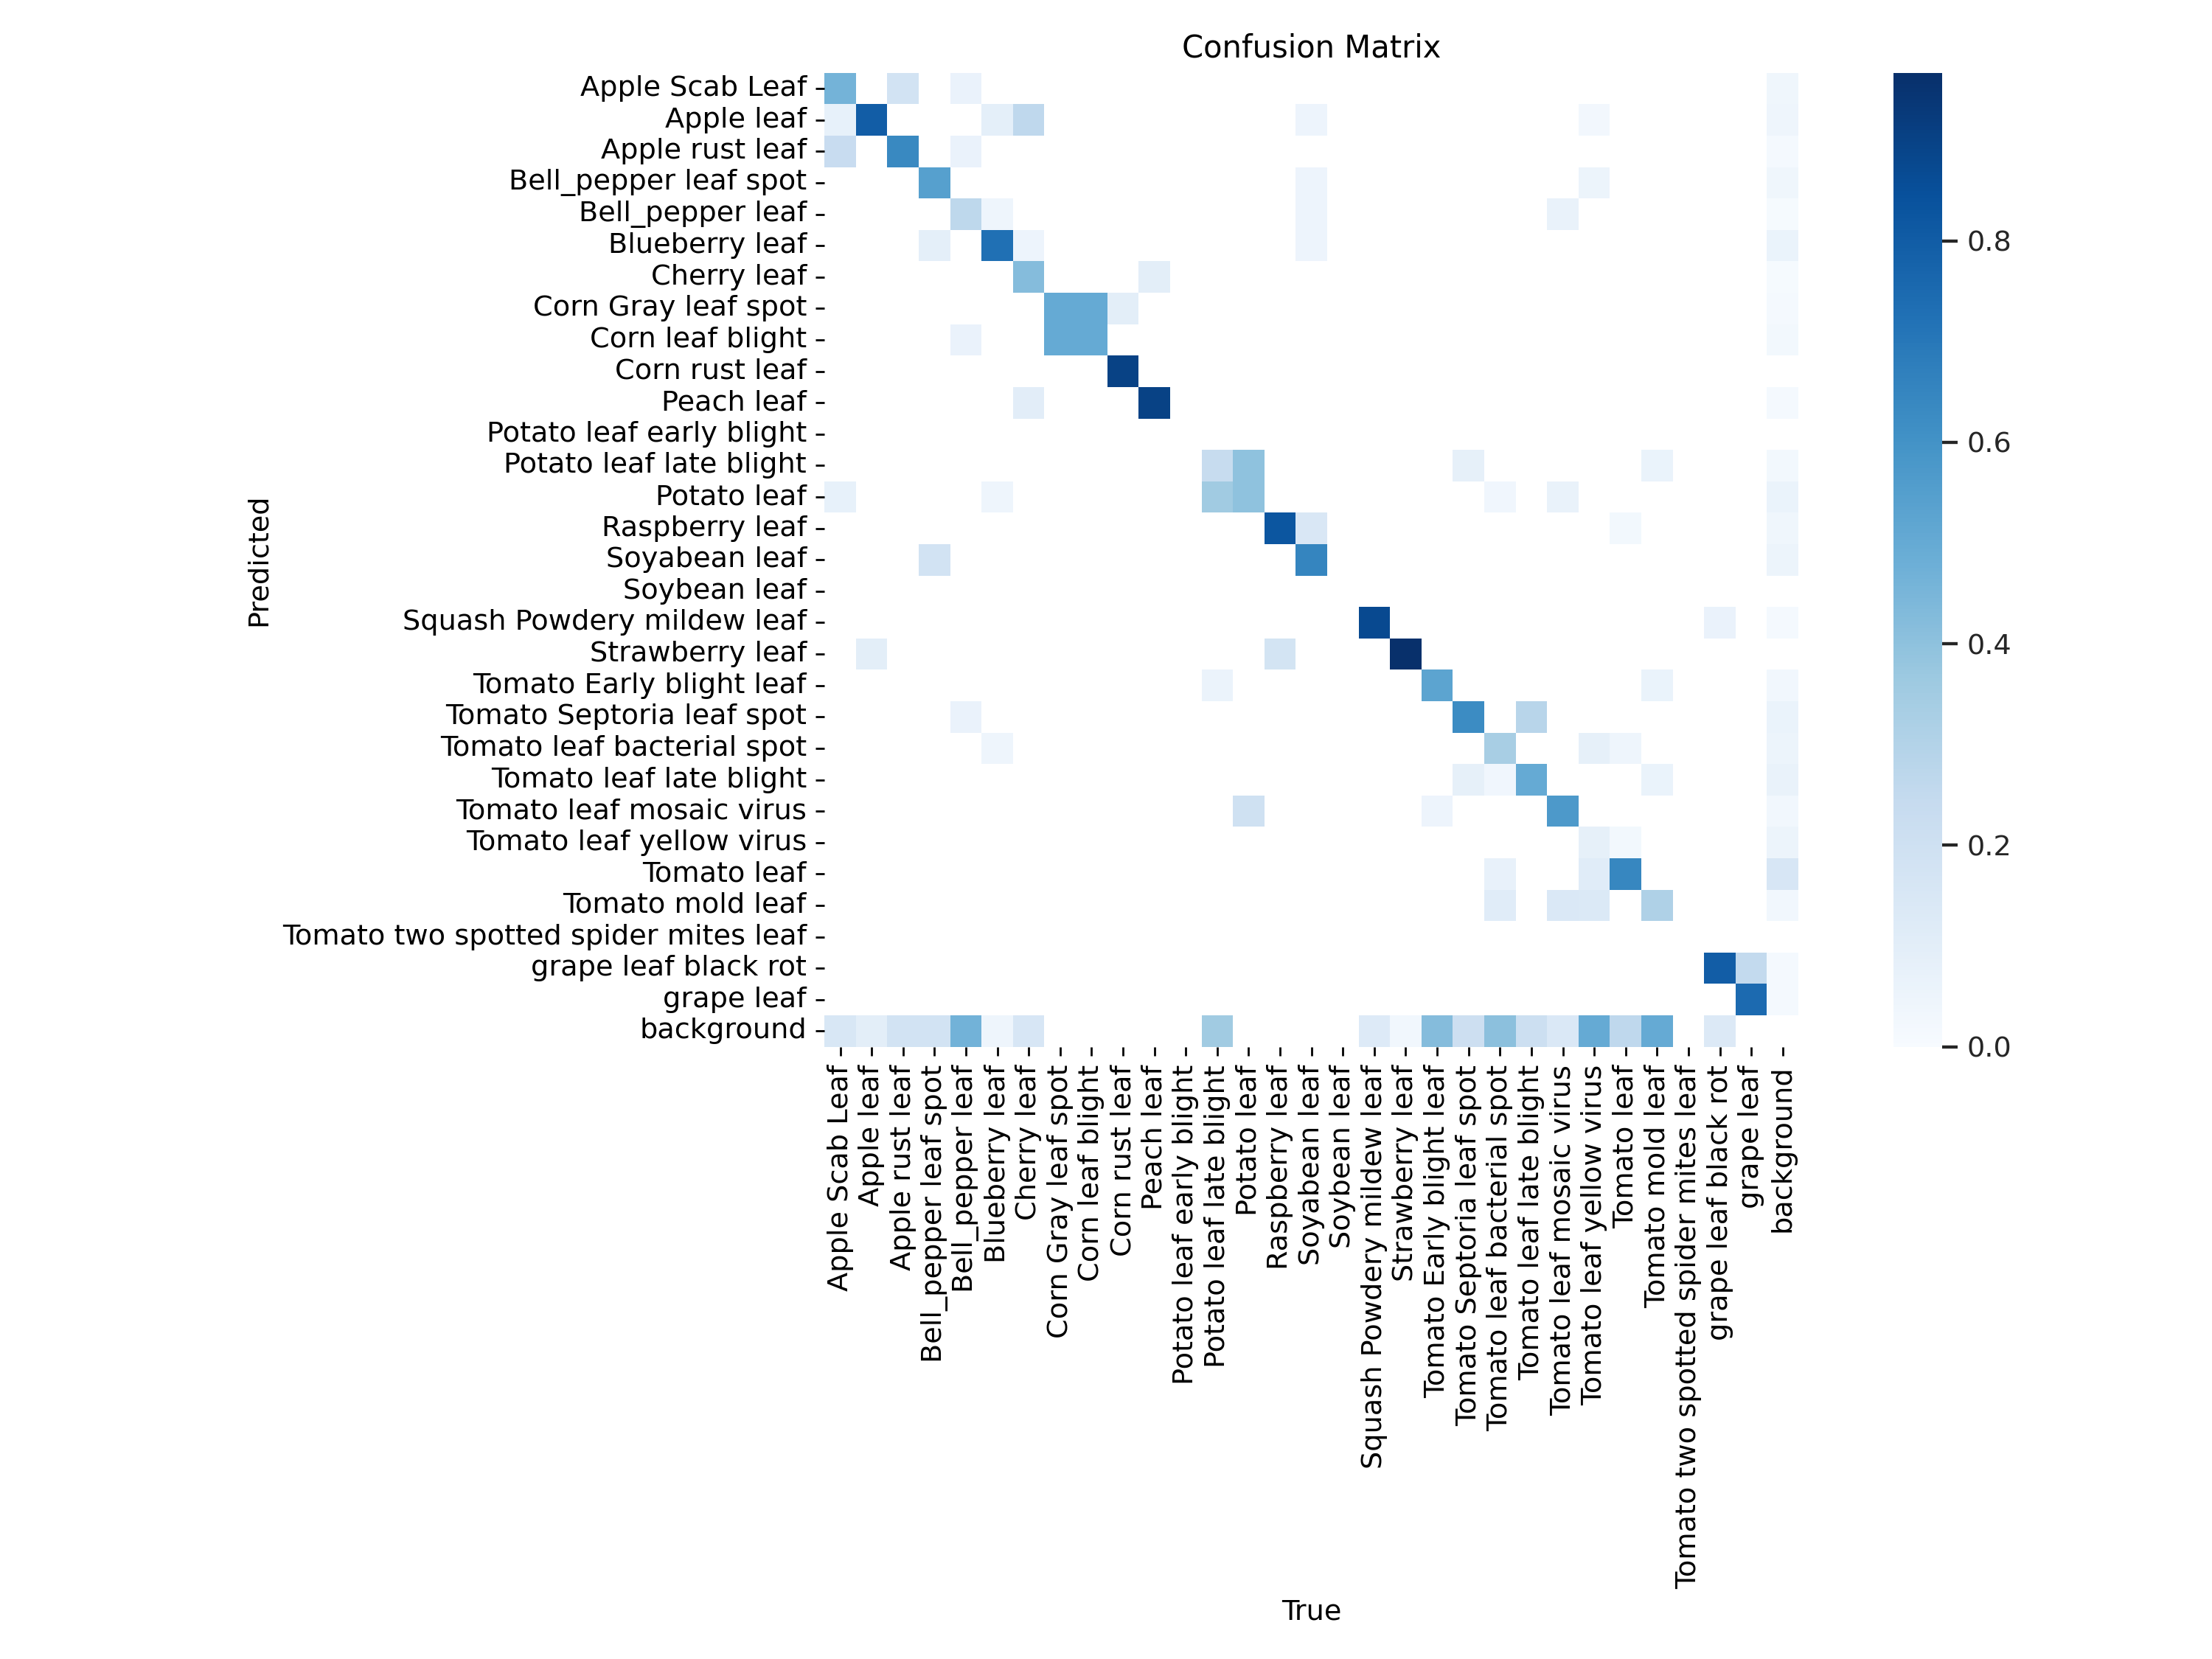

In [ ]:
Image(filename="/content/drive/MyDrive/leaf/yolov5/runs/train/yolov5s_results4/confusion_matrix.png",width=1000)

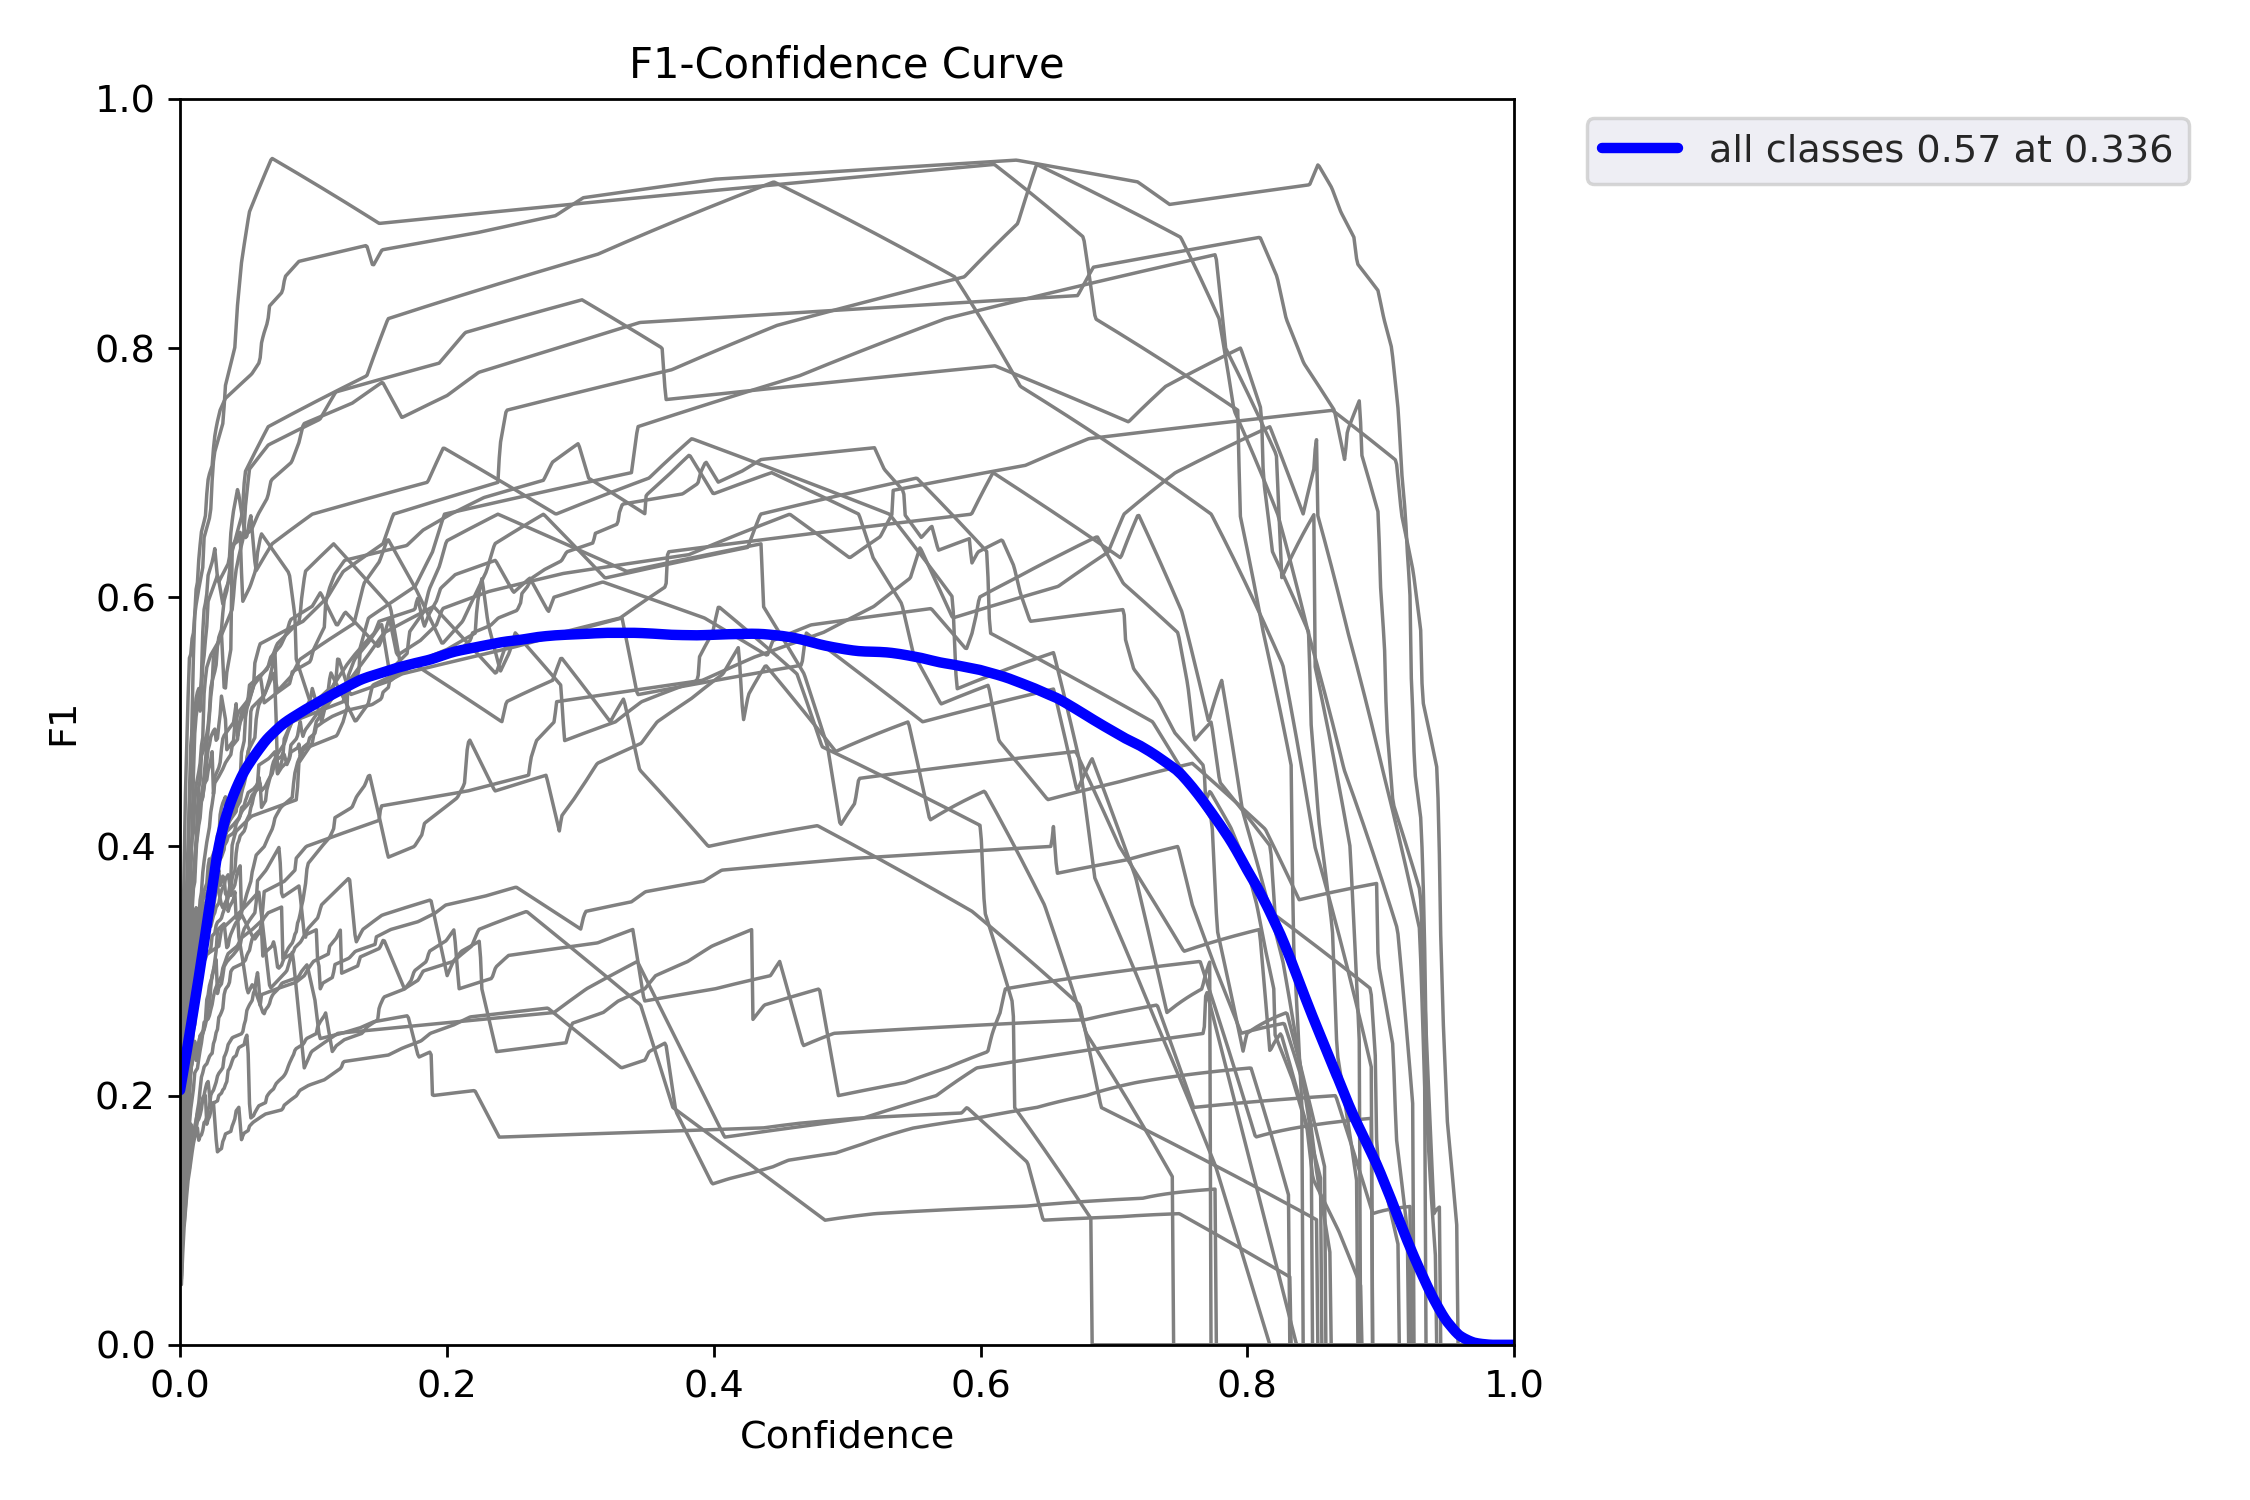

In [ ]:
Image(filename="/content/drive/MyDrive/leaf/yolov5/runs/train/yolov5s_results4/F1_curve.png",width=1000)

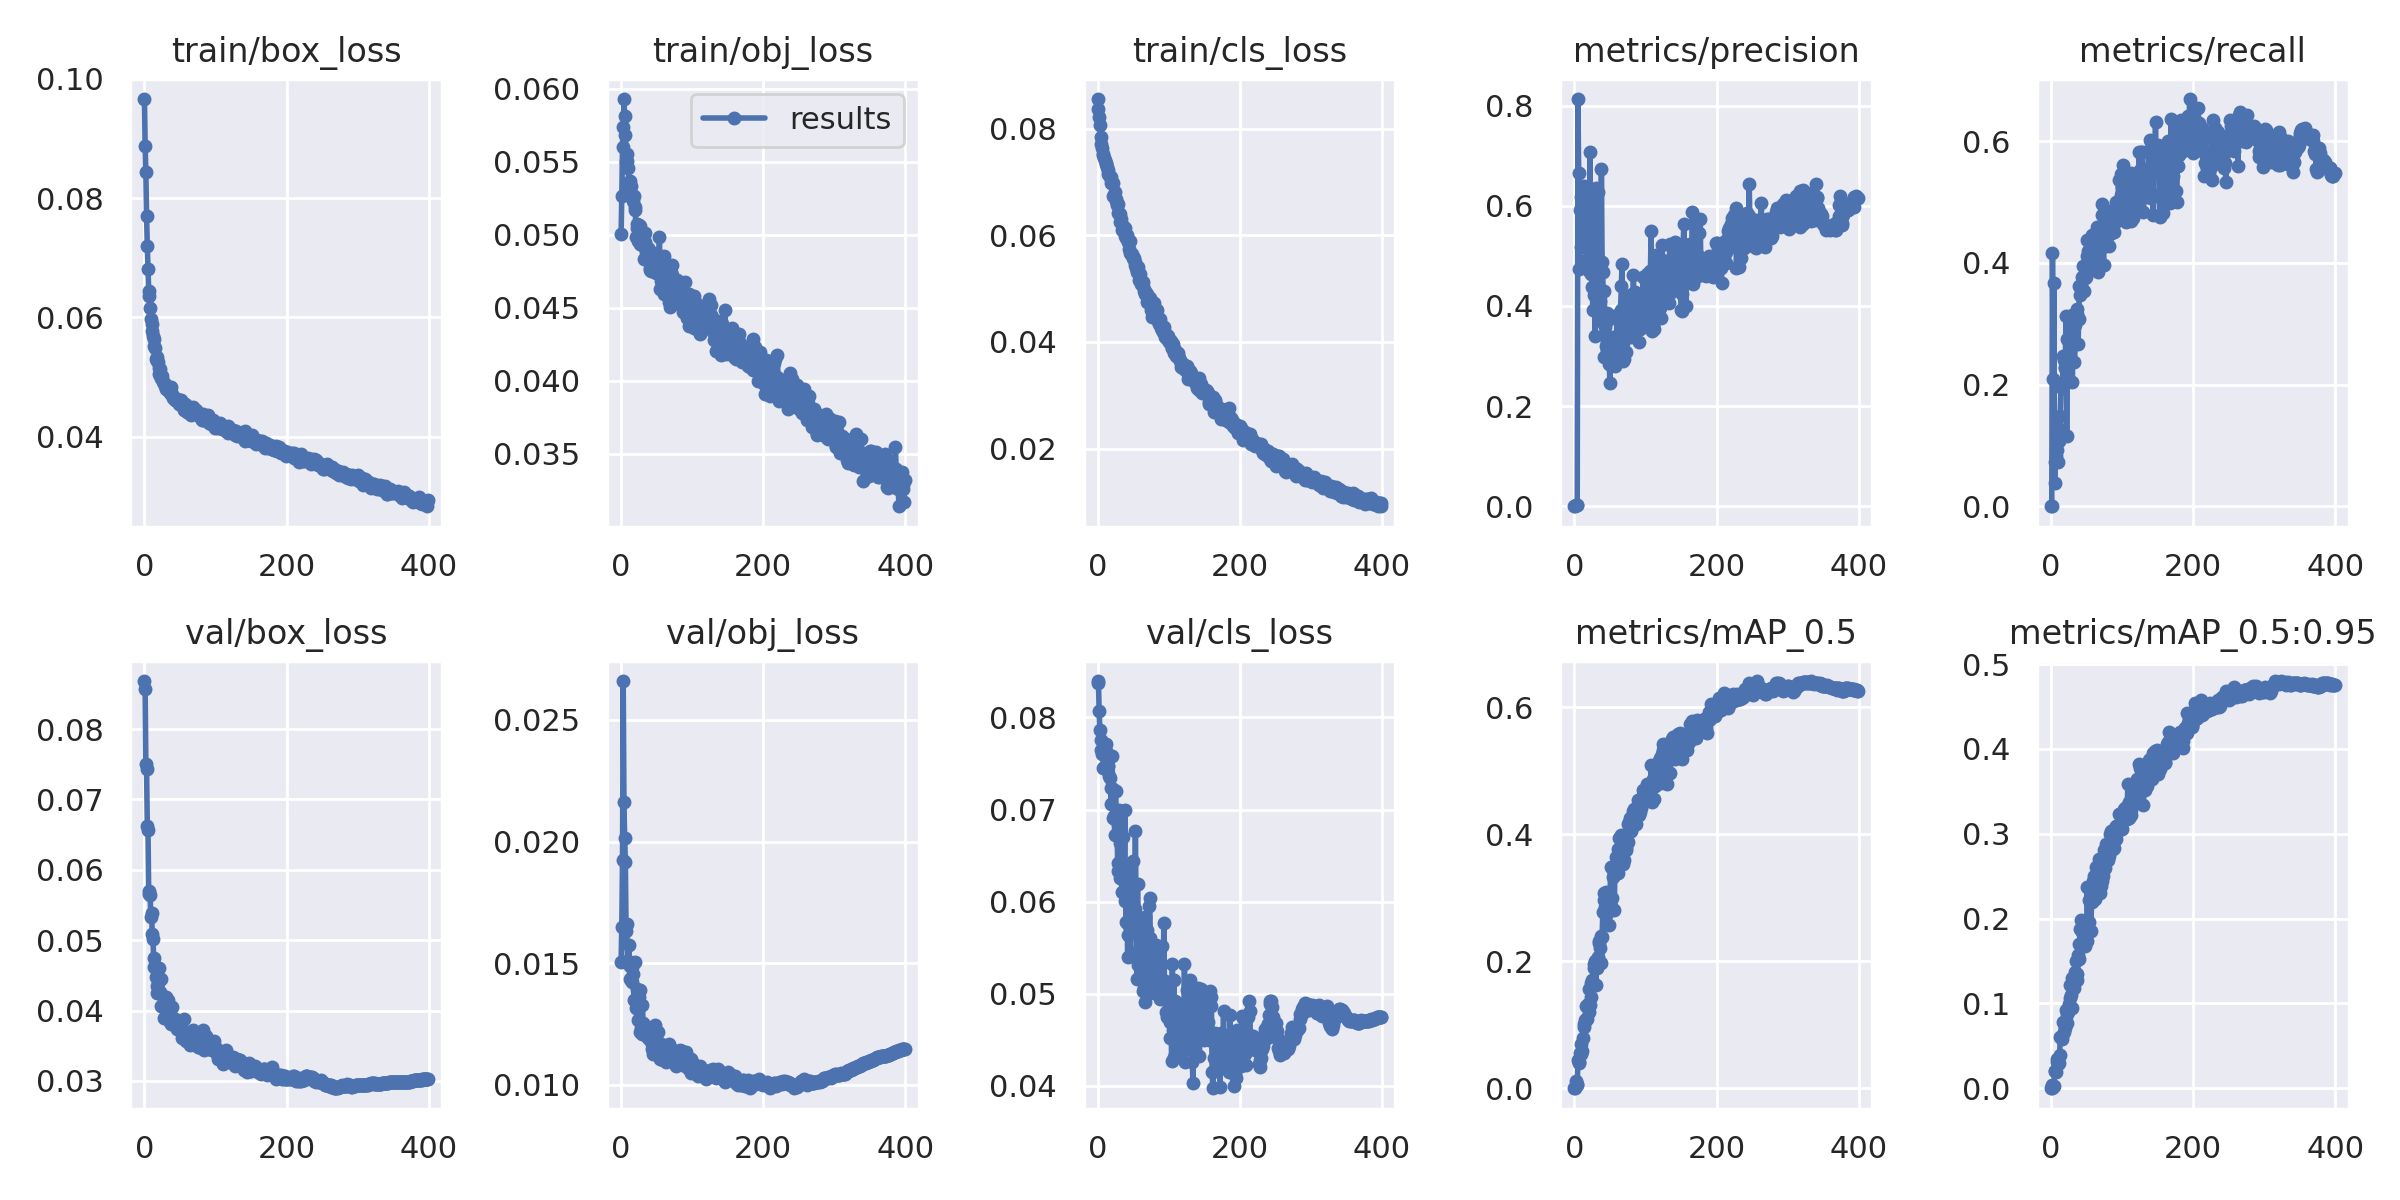

In [ ]:
Image(filename="/content/drive/MyDrive/leaf/yolov5/runs/train/yolov5s_results4/results.png",width=1000)

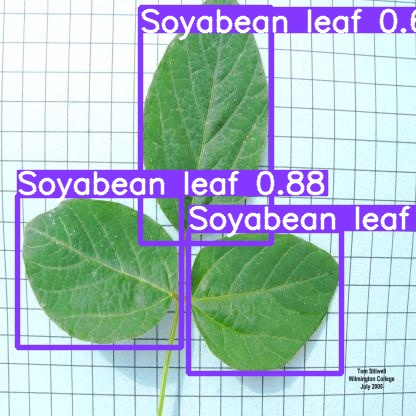

In [ ]:
Image(filename='/content/drive/MyDrive/leaf/yolov5/runs/detect/exp6/Soybean%20edamame%20leaf1_JPG_jpg.rf.852e5a872a31bebe7d848f1b9b664589.jpg',width=500)

In [ ]:
%cd /content/drive/MyDrive/plant

/content/drive/MyDrive/plant


In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image


In [ ]:
!nvidia-smi

Sat Mar 25 04:43:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#!git clone https://github.com/WongKinYiu/yolov7.git       # clone
%cd yolov7
!pip install -r requirements.txt      # install modules

In [ ]:
!python train.py --img 416 --batch 10 --epochs 150 --data data.yaml --cfg cfg/training/yolov7.yaml --hyp data/hyp.scratch.custom.yaml --weights '' --name yolov7s_results  --cache

YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='', cfg='cfg/training/yolov7.yaml', data='data.yaml', hyp='data/hyp.scratch.custom.yaml', epochs=150, batch_size=10, img_size=[416, 416], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=True, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='yolov7s_results', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/yolov7s_results7', total_batch_size=10)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-25 09:28:14.784204: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is opt

In [ ]:
!yolo task=detect mode=train resume="/content/drive/MyDrive/plant/runs/detect/train3/weights/best.pt" model=yolov8n.yaml data=data.yaml


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

In [ ]:
from ultralytics import yolo

!yolo task=detect mode=val model="/content/drive/MyDrive/plant/runs/detect/train3/weights/best.pt" data=data.yaml

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
Model summary (fused): 168 layers, 3011498 parameters, 0 gradients, 8.1 GFLOPs
100% 755k/755k [00:00<00:00, 18.1MB/s]
val: Scanning /content/drive/MyDrive/plant/test/labels.cache... 239 images, 1 backgrounds, 0 corrupt: 100% 239/239 [00:00<?, ?it/s]
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [01:35<00:00,  6.38s/it]
                   all        239        454      0.613      0.588      0.641      0.493
       Apple Scab Leaf        239         13      0.639      0.681      0.653      0.513
            Apple leaf        239         10      0.456        0.7      0.745      0.544
       Apple rust leaf        239         11      0.816      0.636      0.782      0.601
 Bell_pepper leaf spot        239         11      0.412      0

In [ ]:
from ultralytics import yolo

!yolo task=detect mode=val model="/content/drive/MyDrive/plant/runs/detect/train5/weights/best.pt" data=data.yaml

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3011498 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/plant/test/labels.cache... 239 images, 1 backgrounds, 0 corrupt: 100% 239/239 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:07<00:00,  1.89it/s]
                   all        239        454      0.426      0.583      0.516      0.396
       Apple Scab Leaf        239         13       0.33      0.538      0.399      0.316
            Apple leaf        239         10      0.298        0.8      0.579      0.436
       Apple rust leaf        239         11      0.425      0.806      0.487      0.308
 Bell_pepper leaf spot        239         11      0.221      0.364      0.181      0.139
      Bell_pepper leaf        239         15      0.496      0.197      0.285      0.219
        Blueberry leaf        239       

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/plant/runs/detect/train3/weights/best.pt" data=data.yaml source=test/images

In [ ]:
!yolo task=detect mode=predict model="/content/drive/MyDrive/plant/runs/detect/train3/weights/best.pt" data=data.yaml source=test/images

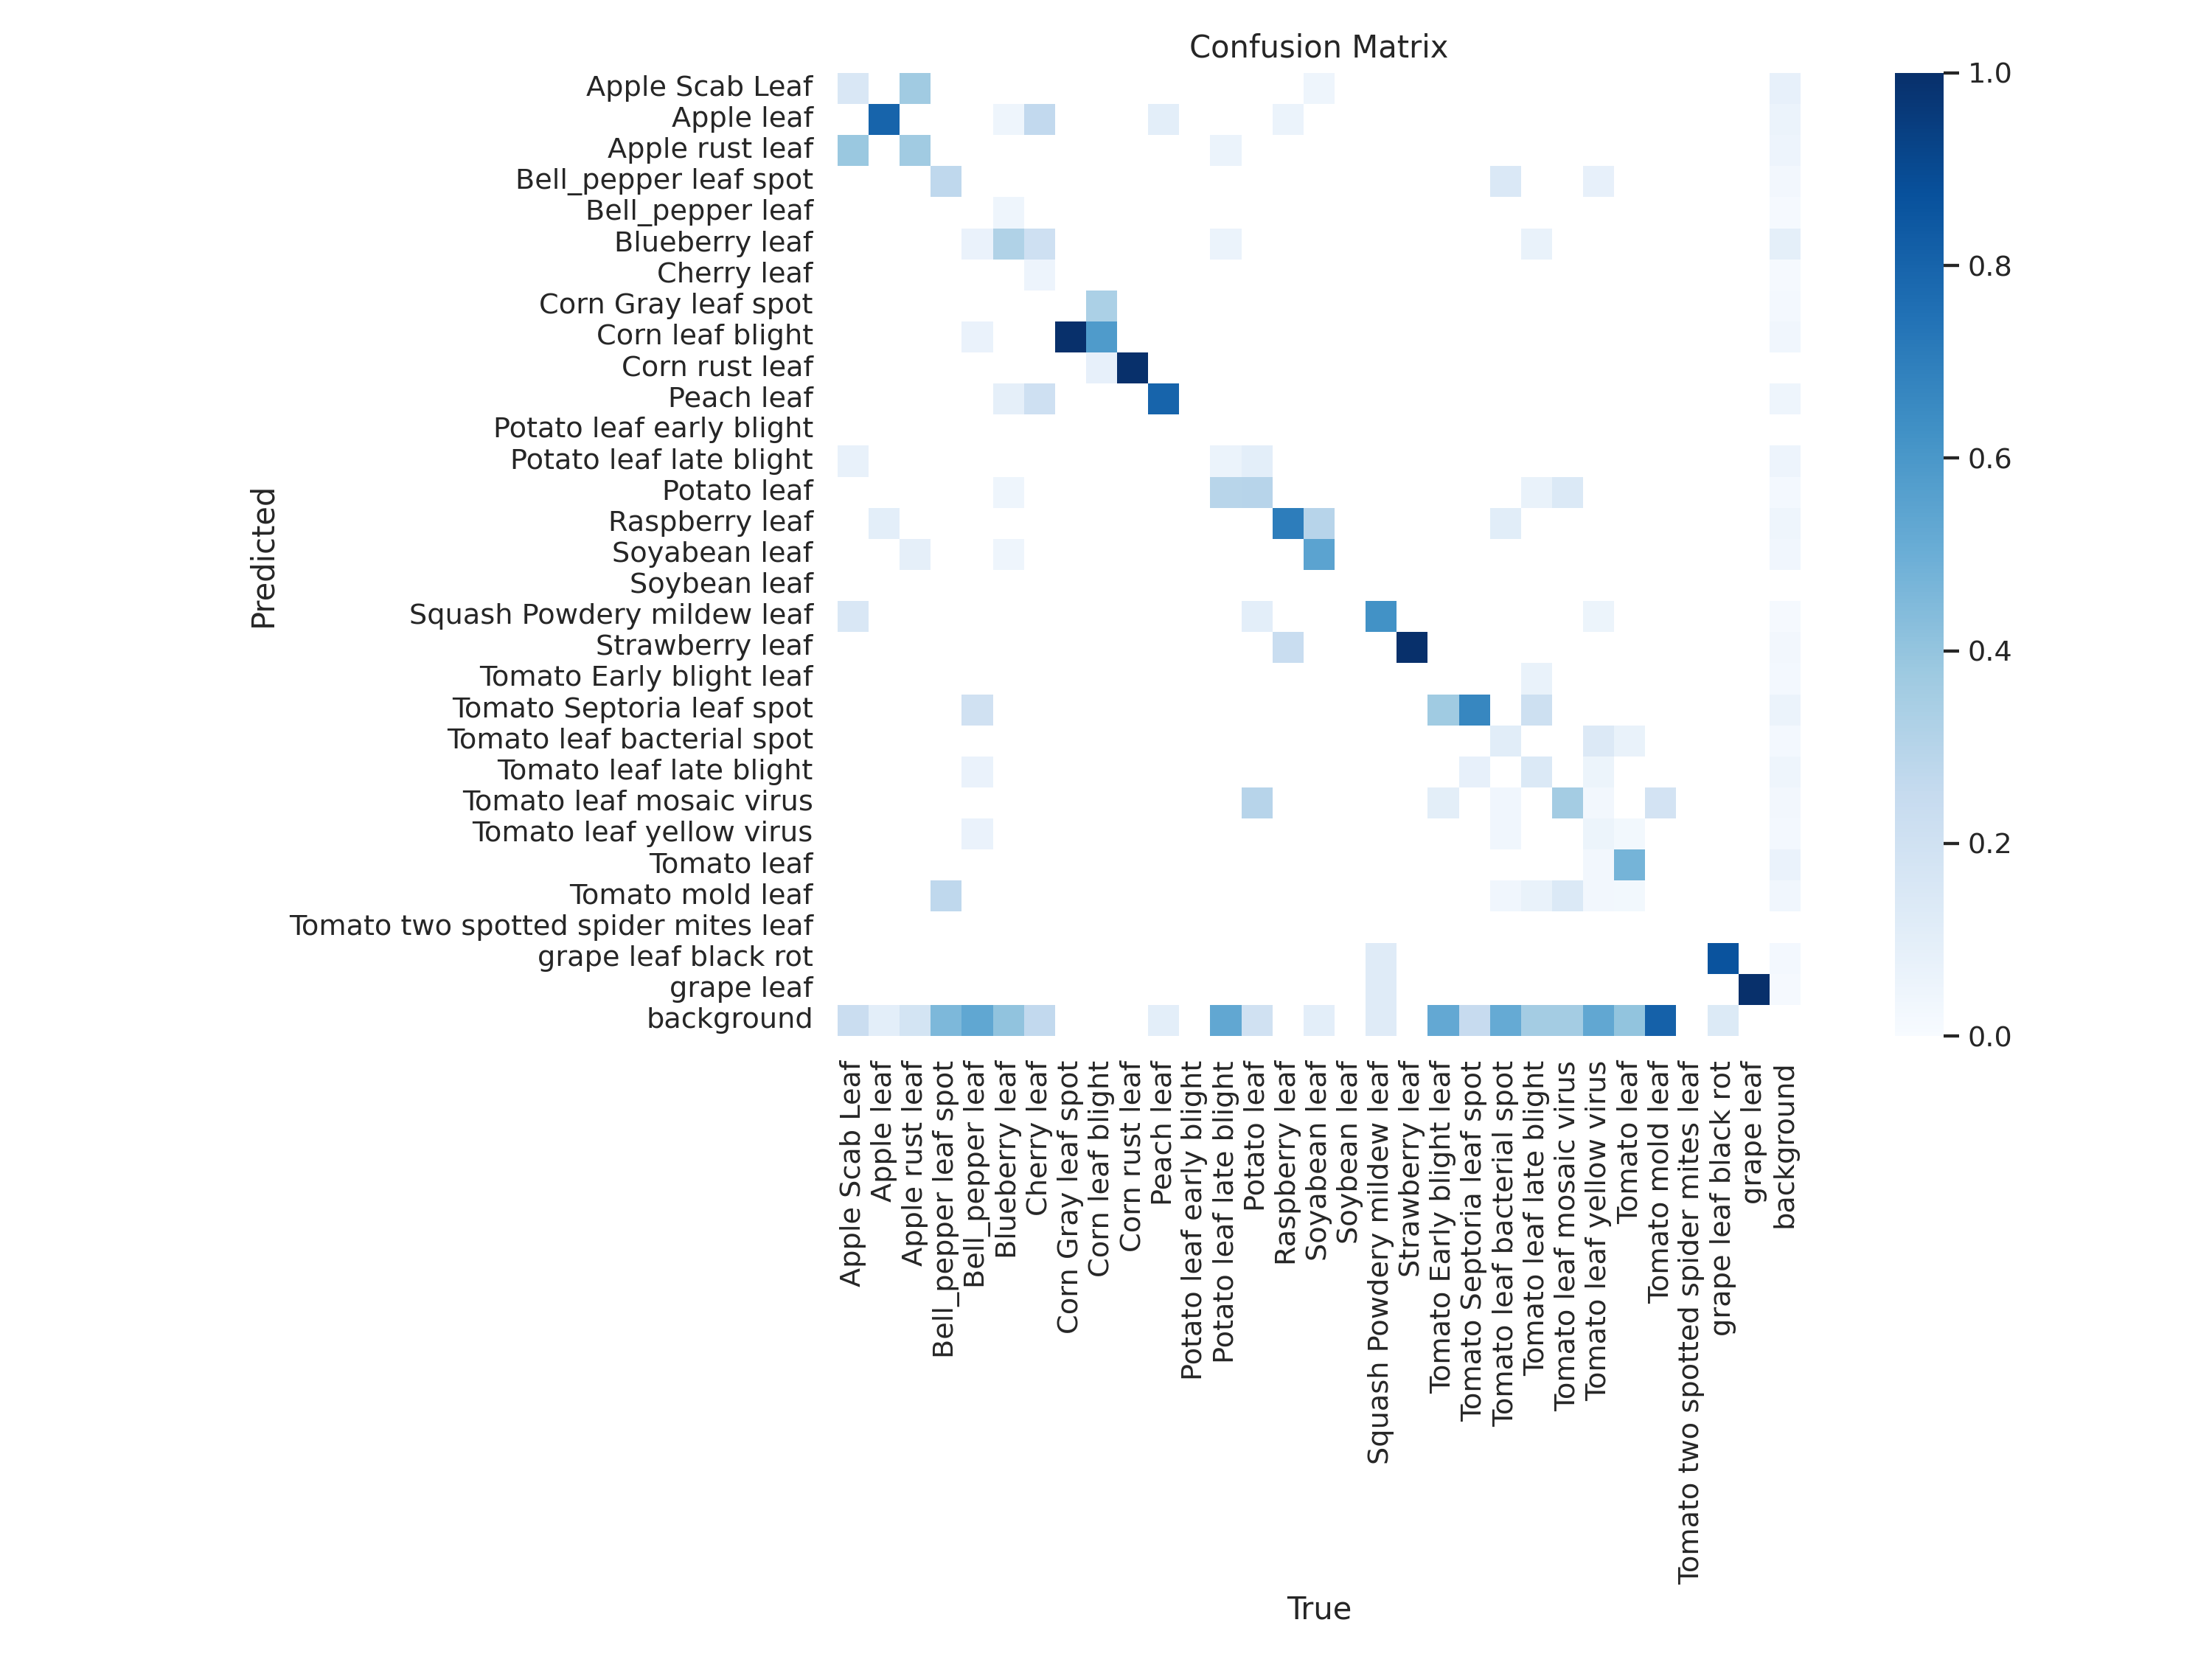

In [ ]:
Image(filename="/content/drive/MyDrive/plant/runs/detect/train5/confusion_matrix.png",width=500)

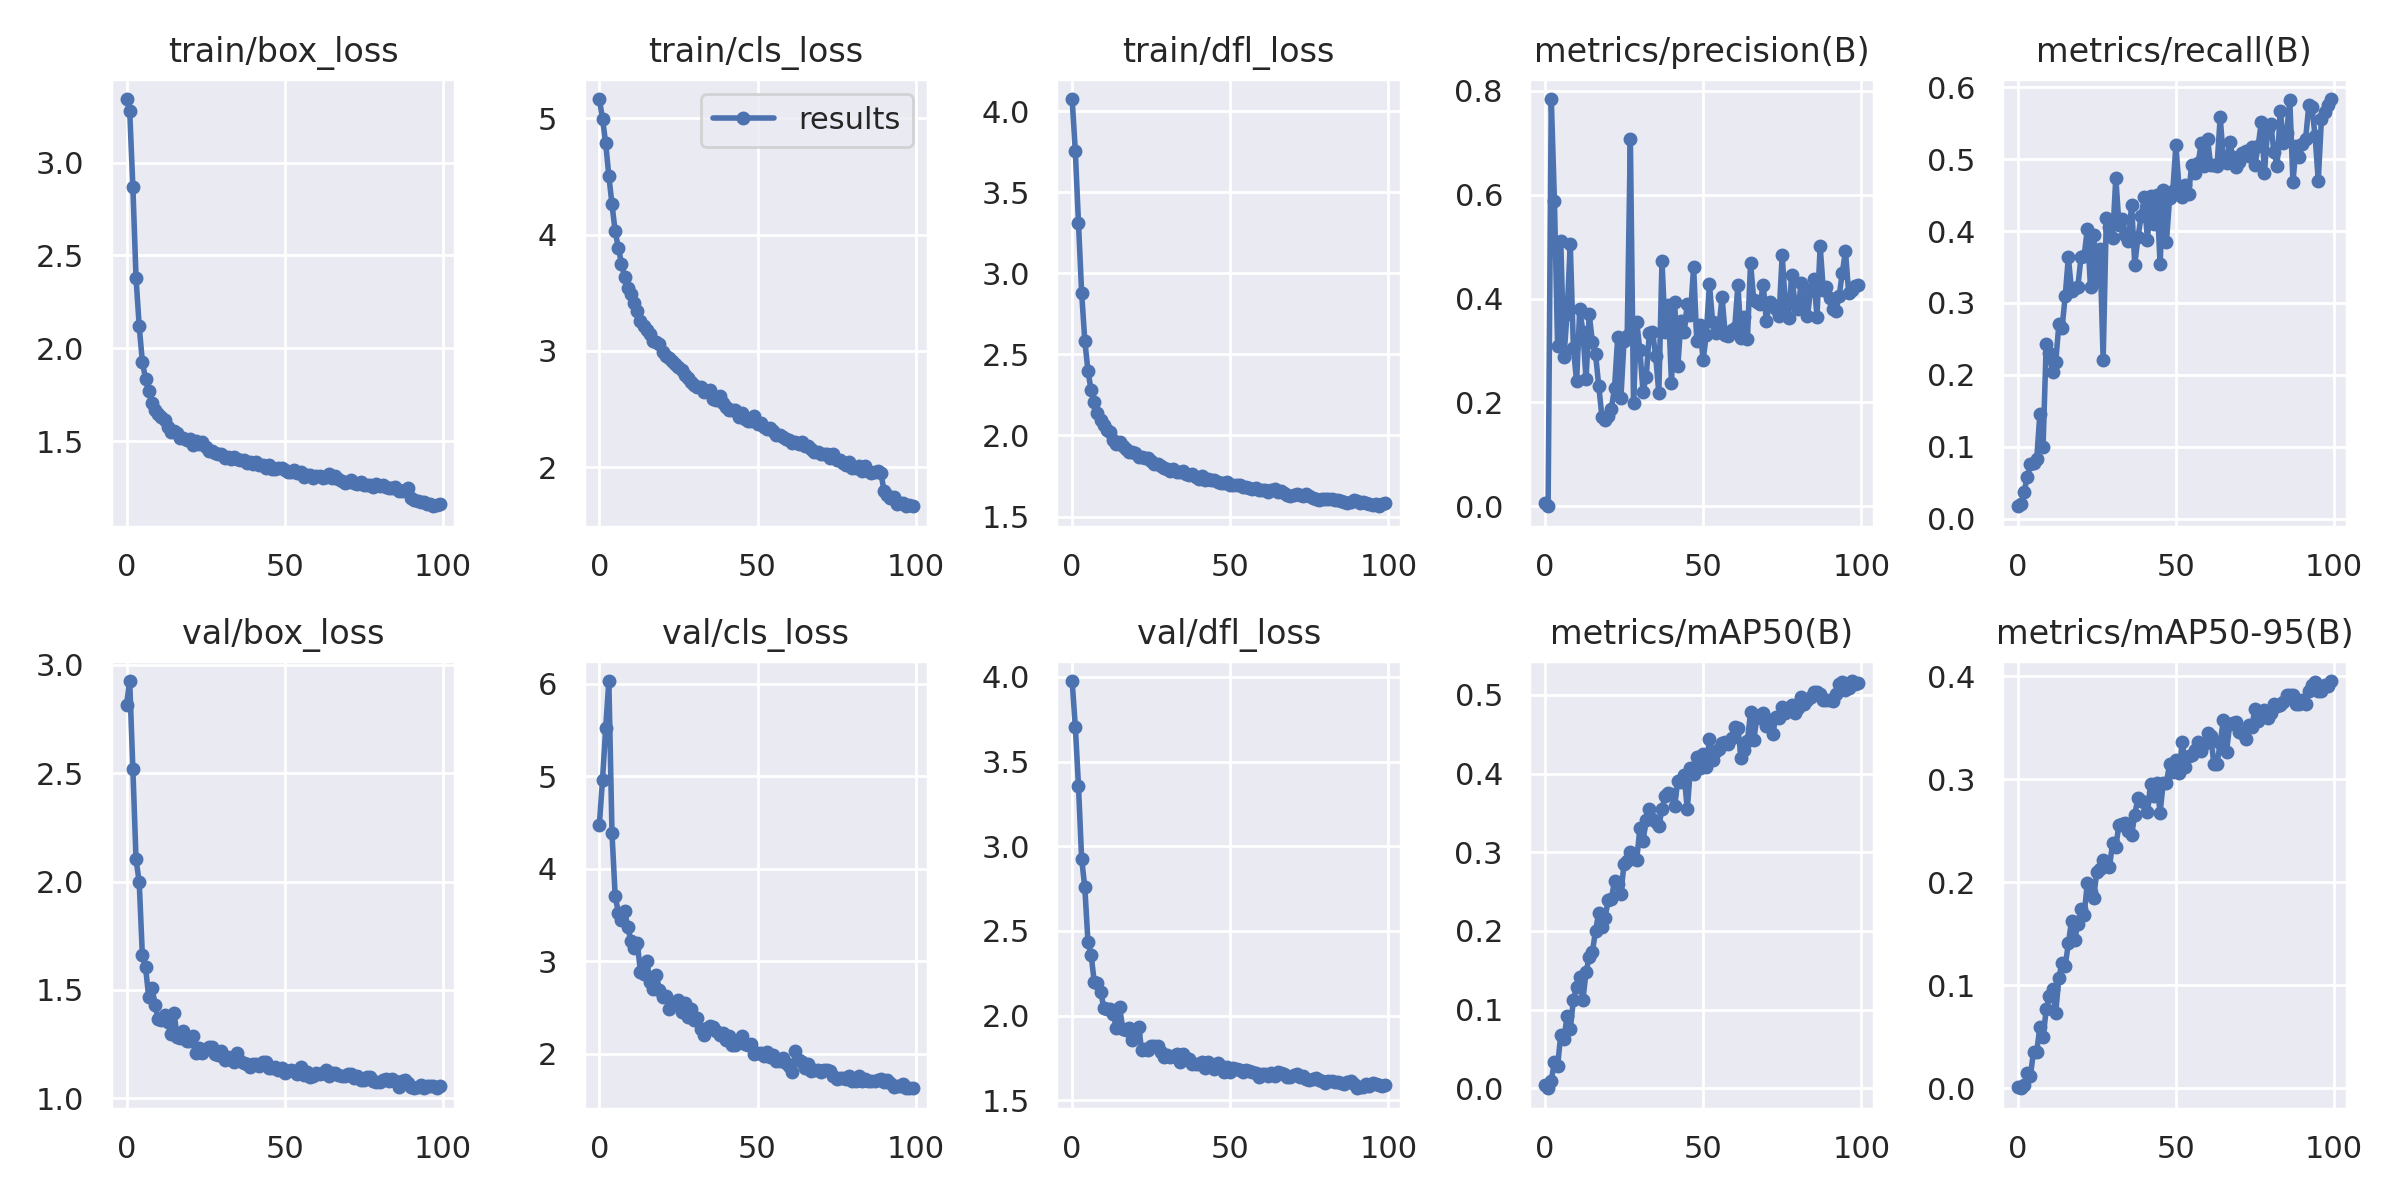

In [ ]:
Image(filename='/content/drive/MyDrive/plant/runs/detect/train5/results.png',width=1000)

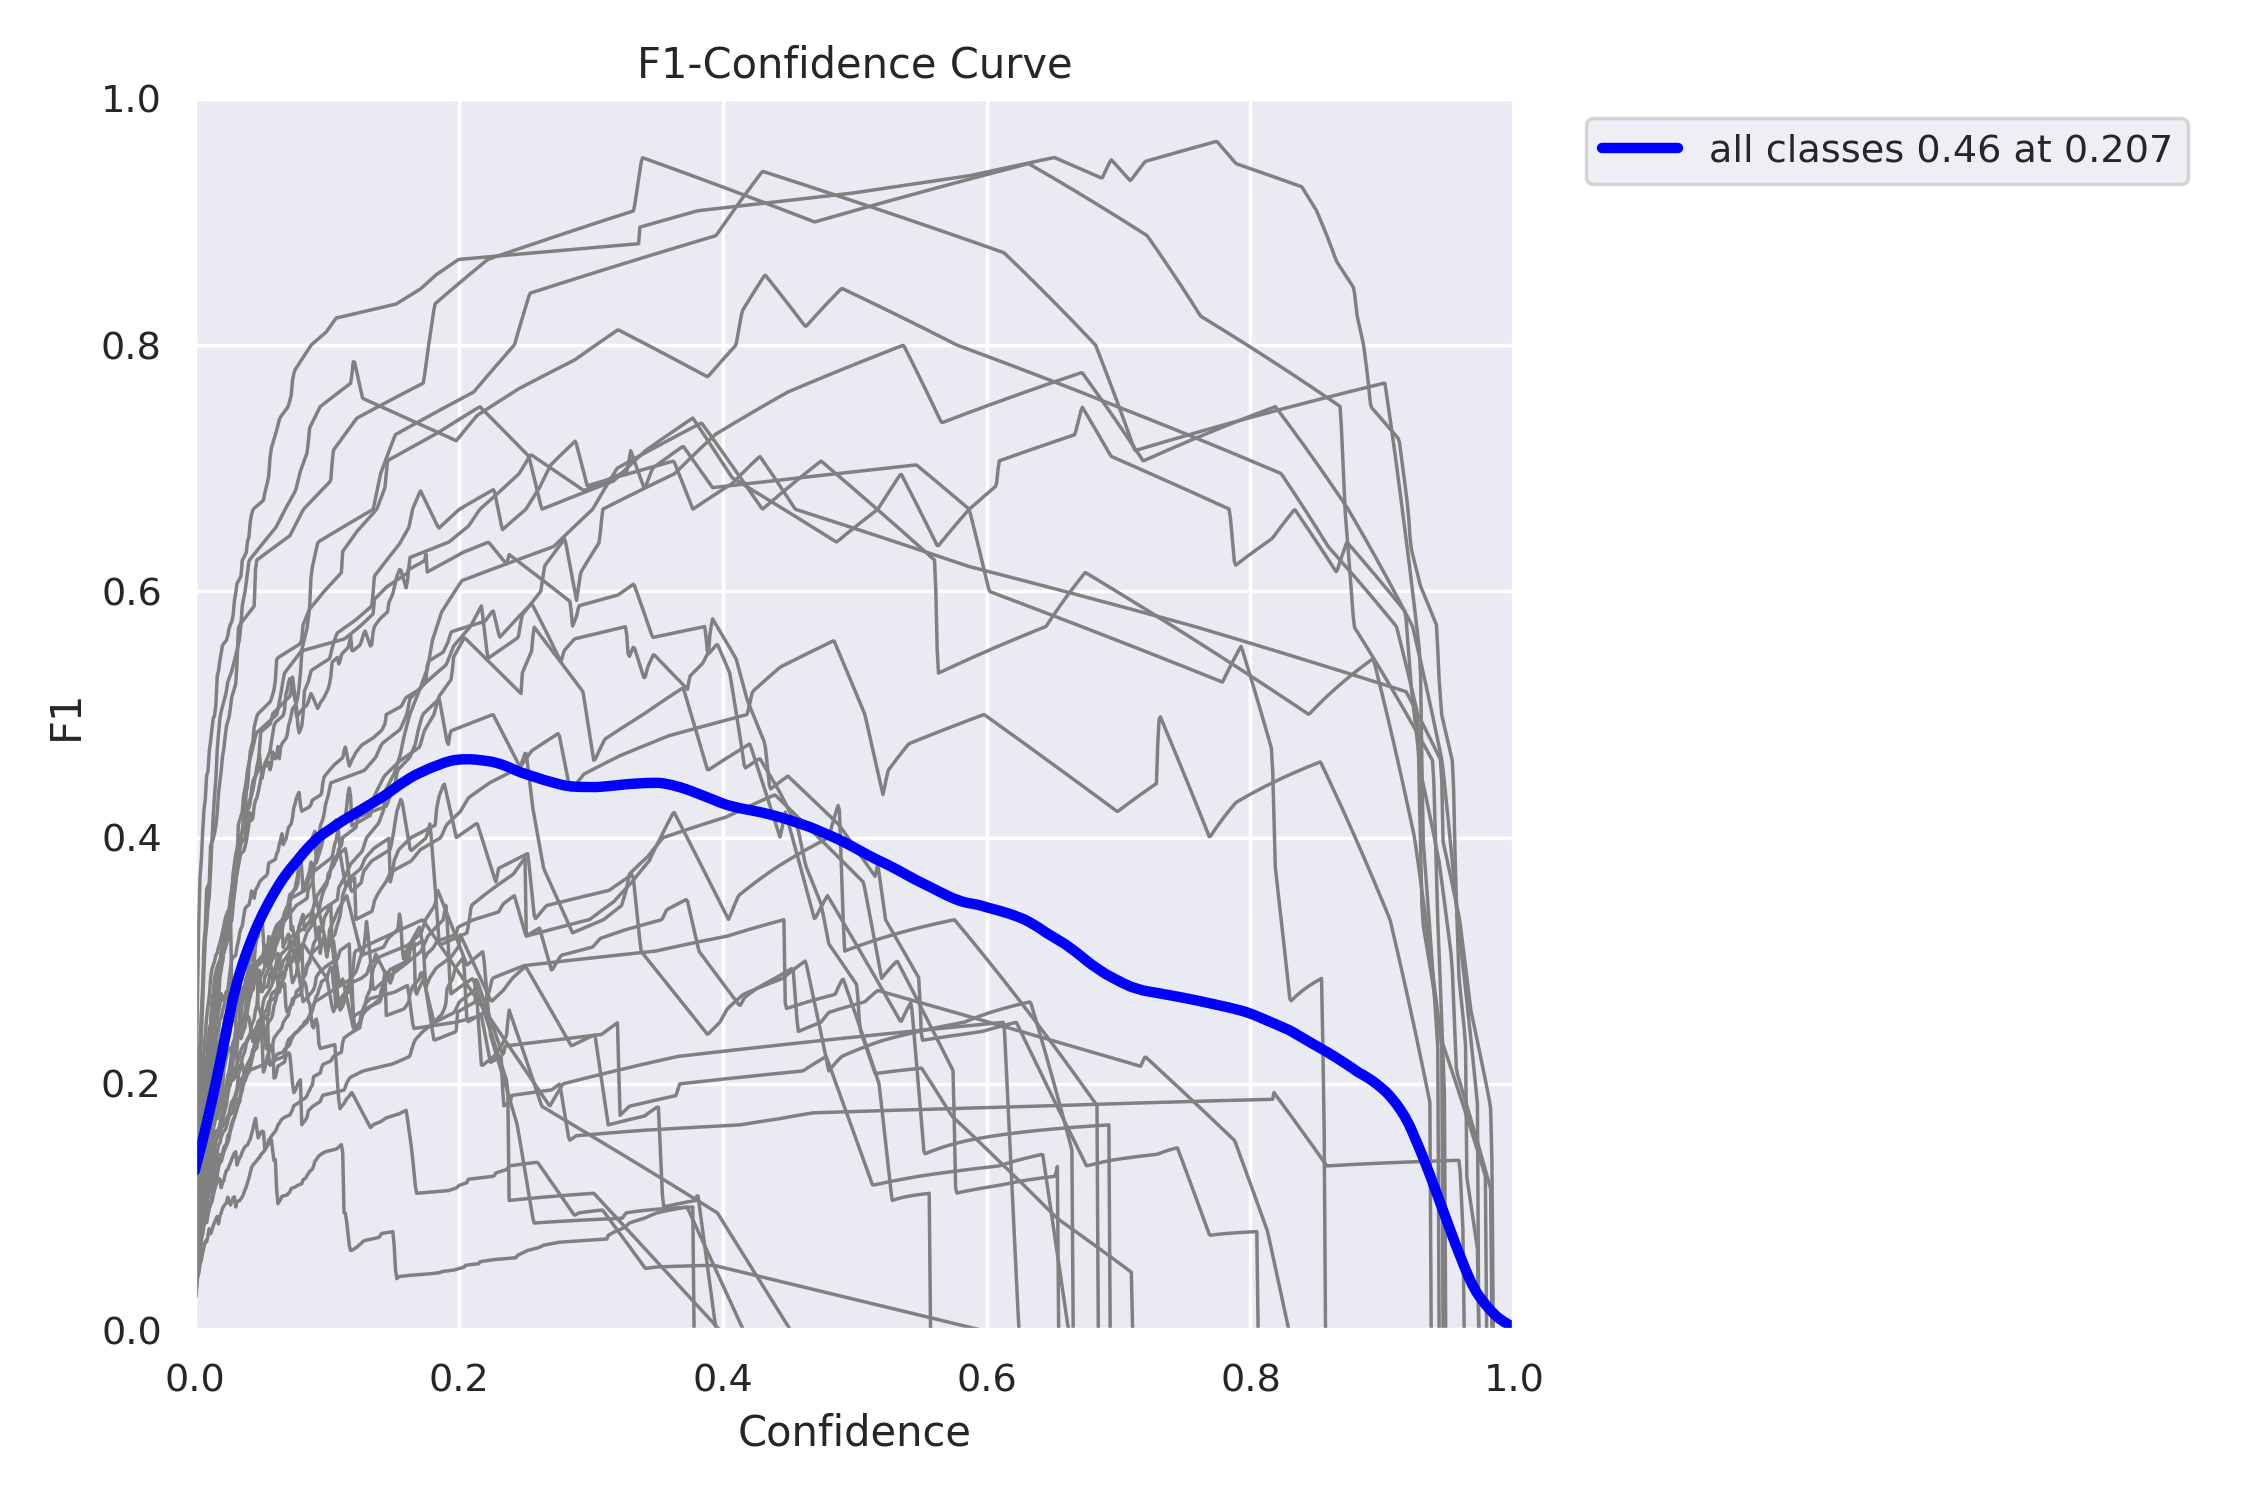

In [ ]:
Image(filename='/content/drive/MyDrive/plant/runs/detect/train5/F1_curve.png',width=1000)

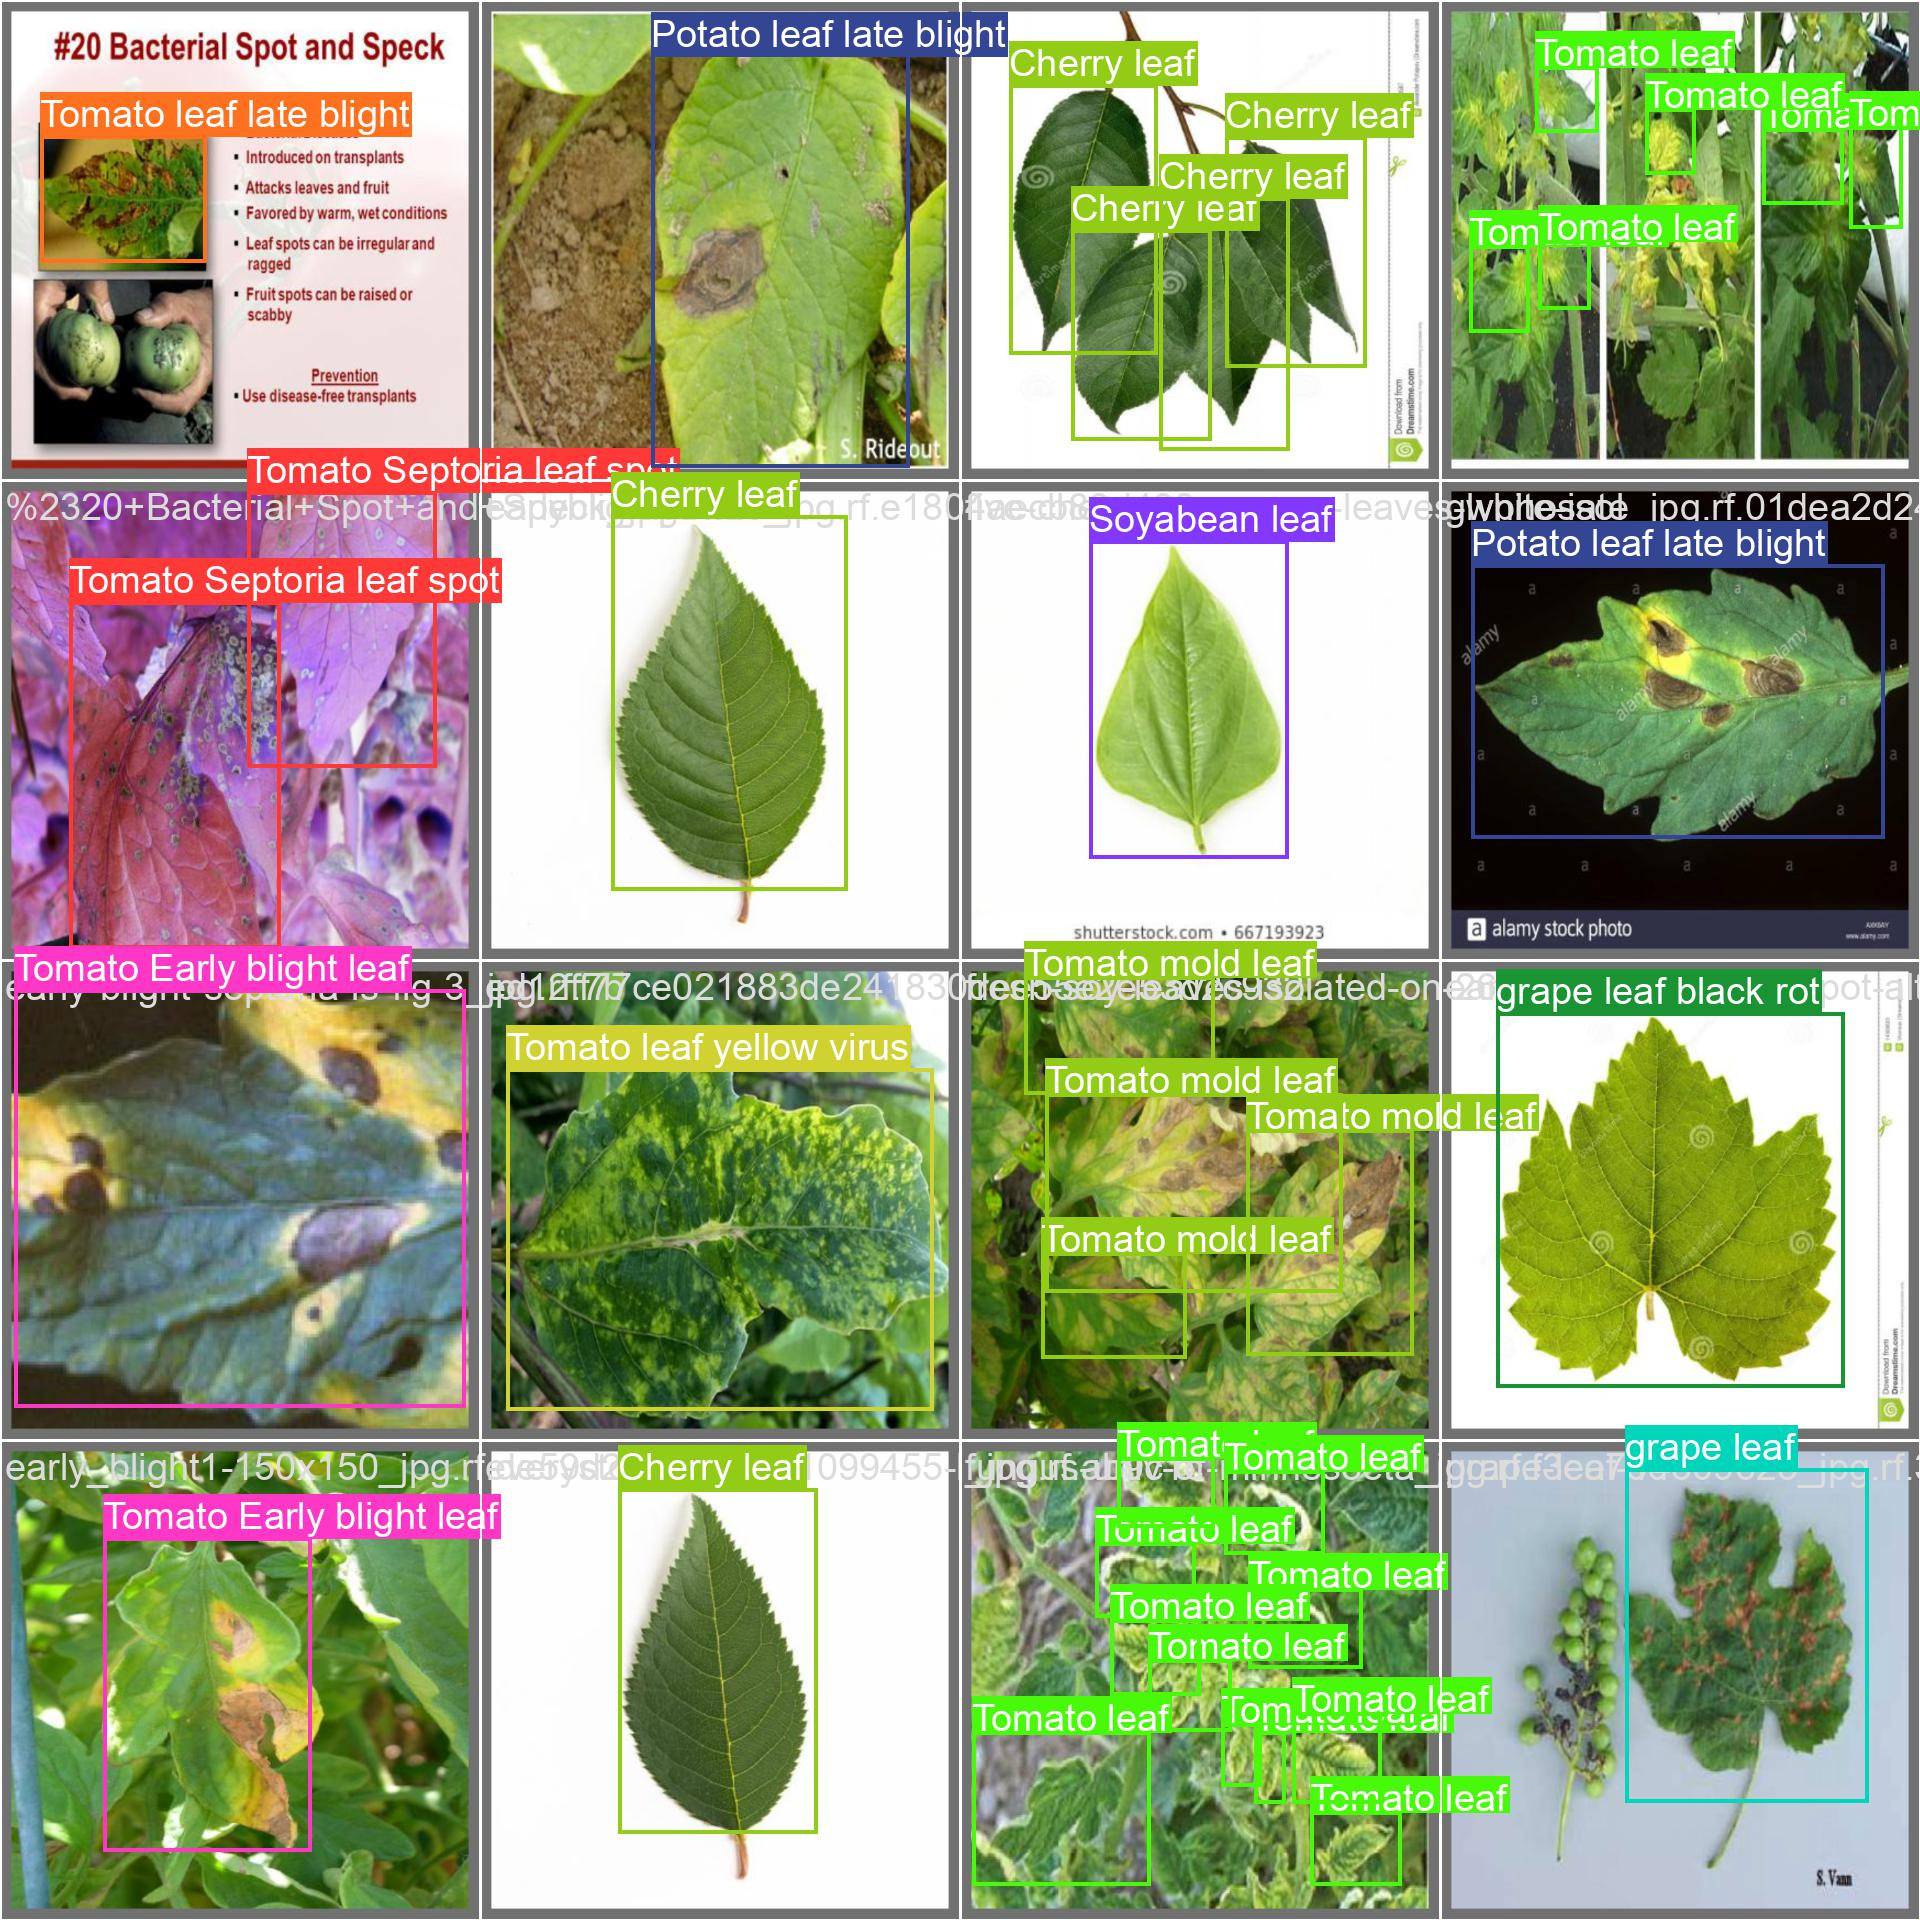

In [ ]:
Image(filename='/content/drive/MyDrive/plant/runs/detect/train5/val_batch0_labels.jpg',width=1000)

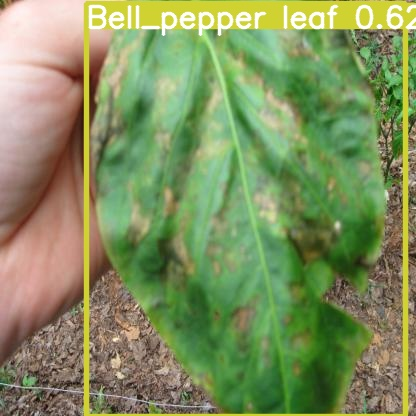

In [ ]:
Image(filename='/content/drive/MyDrive/plant/runs/detect/predict3/000_jpg.rf.79b07e9657b862eca6972264b5e2fe0c.jpg',width=500)